#Installing libraries

In [ ]:
!pip install qiskit
!pip install pylatexenc

In [ ]:
from numpy import *
from matplotlib.pyplot import *

# Importing Standard Qiskit Libraries

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, IBMQ
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator

# Building 3 qubit circuit

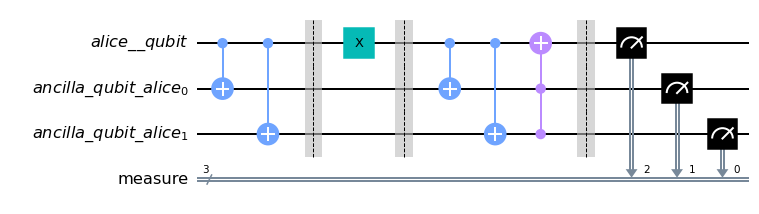

In [ ]:
 cl= ClassicalRegister(3,"measure")
alice_qubit= QuantumRegister(1, 'alice__qubit')

#lq1= QuantumRegister(3, 'logical_qubit_alice')
#ancilla1= QuantumRegister(2, 'anicilla_qubit_alice')
#repetation_code_qc= QuantumCircuit(alice_qubit,lq1,ancilla1,lq2,ancilla2,cr)
#repetation_code_qc= QuantumCircuit(alice_qubit,lq1,lq2,cr)

ancilla_qubit= QuantumRegister(2, 'ancilla_qubit_alice')
rep_ckt= QuantumCircuit(alice_qubit, ancilla_qubit, cl)

#Encoding
rep_ckt.cx(alice_qubit, ancilla_qubit)
rep_ckt.barrier()

#repetition_code_qc.h(alice_qubit[0])
#repetition_code_qc.barrier()
#repetition_code_qc.cx(alice_qubit,lq1)
#repetition_code_qc.barrier()

rep_ckt.x([0])
rep_ckt.barrier()

#Decoding
rep_ckt.cx(alice_qubit, ancilla_qubit)
rep_ckt.mct([1,2],0)


# avoid the gates being combined
rep_ckt.barrier()

rep_ckt.measure([0,1,2], cl[::-1])

rep_ckt.draw(output='mpl')

In [ ]:
sim = Aer.get_backend('qasm_simulator') 
res= execute(rep_ckt, backend=sim, shots=64).result().get_counts()
print(res)

{'011': 64}


['011']


In [ ]:
result=[]
for a1 in range(2):
      for a2 in range(2):
           for a3 in range(2):
                     a=["I","I","I"]
                                            
                     alice_qubit= QuantumRegister(1, 'alice__qubit')
                     lq1= QuantumRegister(2, 'ancilla_qubit_alice')
                     cr= ClassicalRegister(1)
                     repetition_code_qc= QuantumCircuit(alice_qubit, ancilla_qubit, cr)
                                            
                     #Encoding 
                                              
                     rep_ckt.cx(alice_qubit, ancilla_qubit)
                     rep_ckt.barrier()

                     #repetition_code_qc.h(alice_qubit[0])
                     #repetition_code_qc.barrier()
                     #repetition_code_qc.cx(alice_qubit,lq1)
                     #repetition_code_qc.barrier()
                                            
                     repetition_code_qc.barrier()
                                            
                     if a1:
                       a[0]="X"
                       repetition_code_qc.x(0)
                     if a2:
                       a[1]="X"
                       repetition_code_qc.x(1)
                     if a3:
                       a[2]="X"
                       repetition_code_qc.x(2)
                                            
                     #Decoding 

                     repetition_code_qc.cx(alice_qubit, ancilla_qubit)
                     repetition_code_qc.mct([1,2],0)
                                          
                     sim = Aer.get_backend('qasm_simulator') 
                     #repetition_code_qc.measure(alice_qubit[0,0,0], lq1[0], lq1[1], cr[2])
                     repetition_code_qc.measure(0,0)
                     res= execute(repetition_code_qc, backend=sim, shots=64).result().get_counts()
                     
                     a.append(res)
                     result.append(a)
                     
                    

In [ ]:
result

[['I', 'I', 'I', {'0': 64}],
 ['I', 'I', 'X', {'0': 64}],
 ['I', 'X', 'I', {'0': 64}],
 ['I', 'X', 'X', {'1': 64}],
 ['X', 'I', 'I', {'0': 64}],
 ['X', 'I', 'X', {'1': 64}],
 ['X', 'X', 'I', {'1': 64}],
 ['X', 'X', 'X', {'1': 64}]]

In [ ]:
count=0
corrected = []
for c in result:
    if c[3]=={'0': 64}:
        count=count+1
        corrected.append(c[:3])
print(count)

4


In [ ]:
corrected

[['I', 'I', 'I'], ['I', 'I', 'X'], ['I', 'X', 'I'], ['X', 'I', 'I']]

In [ ]:
Summary= {0:0,1:0,2:0,3:0}
for i in corrected:
    count=0
    for x in i:
        if x=="X":
            count=count+1
    Summary[count]+=1

print(Summary)

{0: 1, 1: 3, 2: 0, 3: 0}


In [ ]:
p=linspace(0,0.5,21)
fid1= (1-p) # No repetition code

fid2=0
fid3=0

c1=  Summary

for i in range(4):
     fid2+= c1[i]*(p**i)*((1-p)**(3-i))


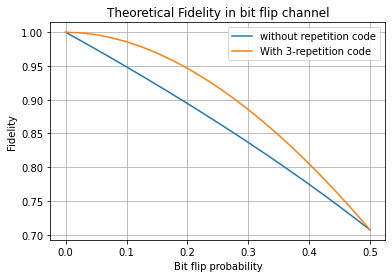

In [ ]:
plot(p,sqrt(fid1), label="without repetition code")
plot(p,sqrt(fid2), label="With 3-repetition code")
title("Theoretical Fidelity in bit flip channel")
xlabel("Bit flip probability")
ylabel("Fidelity")
grid()
legend()